# Intorduction

In this section, we will answer questions related to popularity of the different saes present in our dataset, these are the three questions we will process:

<ul>
<li>What are the top 10 most sold vehicle makes and what is the most popular model for each make?</li>
<li>How much is the percentage of each vehicle's outer and interior color's popularity?</li>
<li>How many sales have Kia and BMW made between 2000 and 2015, and which one was more popular on average?</li>
</ul> 

# Import and data loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

sys.path.append(os.path.abspath('../src'))

from data_loader import load_data

In [2]:
data = load_data("data.csv", "processed", False)

# Top 10 most sold vehicle makes and the most popular model for each make

In [84]:
top10make = data.make.value_counts().sort_values(ascending = False).iloc[:10]

In [86]:
model_names = []
model_vals = []
for make in top10make.index:
    model_names.append(data[data.make == make].model.value_counts().index[0])
    model_vals.append(data[data.make == make].model.value_counts().iloc[0])

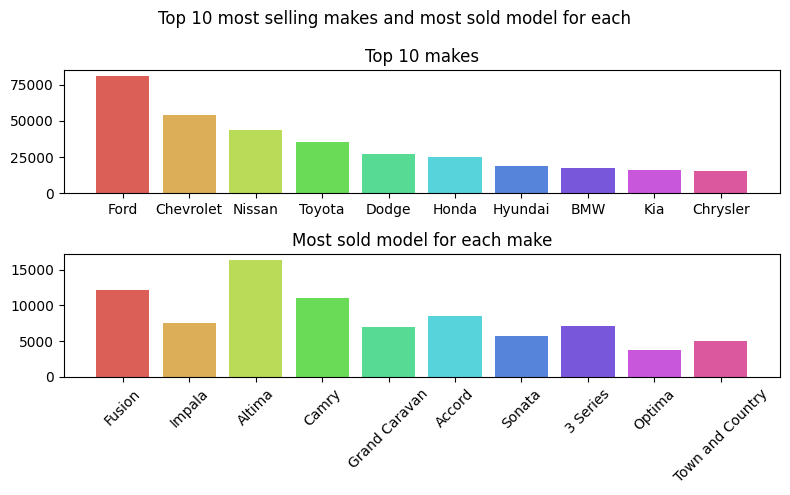

In [137]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 5))

x = np.arange(10)
ax[0].bar(top10make.index[x], top10make.iloc[x], color=(sns.color_palette("hls", 10)))
ax[0].set_title("Top 10 makes")

ax[1].bar(model_names, model_vals, color=(sns.color_palette("hls", 10)))
ax[1].set_title("Most sold model for each make")
ax[1].tick_params(axis='x', rotation=45)

fig.subplots_adjust(hspace=0.5, wspace=0.3) 
fig.suptitle("Top 10 most selling makes and most sold model for each")
plt.tight_layout()
plt.show()


# Percentage of each vehicle's outer and interior color's popularity

In [42]:
outer = data.color.value_counts()
interior = data.interior.value_counts()

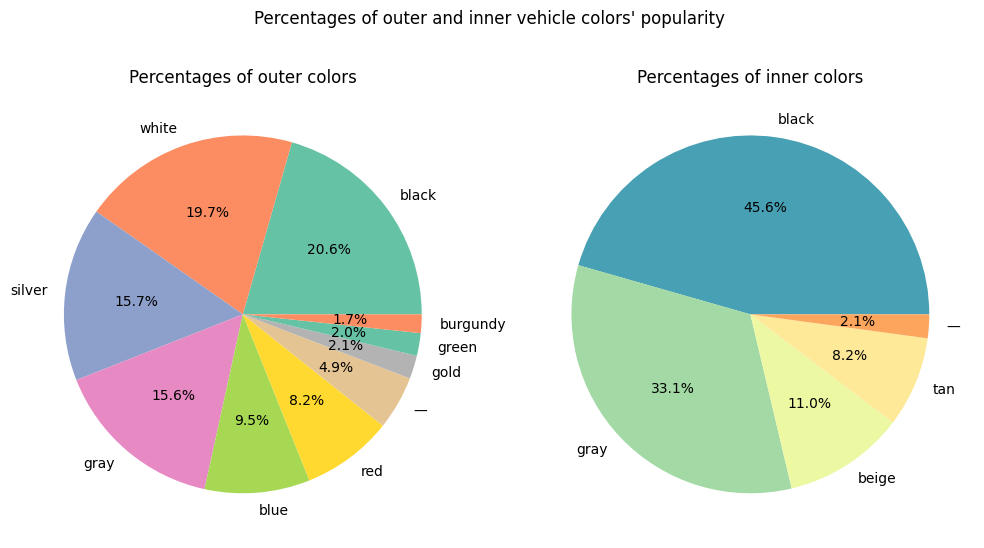

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

out_color_counts = np.arange(10) # Top 10
inter_color_counts = np.arange(5) # Top 5

ax[0].pie(x = outer.iloc[out_color_counts], labels= outer.index[out_color_counts], colors=sns.color_palette("Set2"), autopct='%1.1f%%')
ax[0].set_title("Percentages of outer colors")

ax[1].pie(x = interior.iloc[inter_color_counts], labels= interior.index[inter_color_counts], colors=sns.color_palette("Spectral_r"), autopct='%1.1f%%')
ax[1].set_title("Percentages of inner colors")

plt.suptitle("Percentages of outer and inner vehicle colors' popularity")
plt.tight_layout()
plt.show()

# 2000 - 2015 Kia and BMW sales